# Python intro for ML
Author: Tobias Weis

Date: 17.05.2016

Tool: jupyter notebook, python 2.7

In [171]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, accuracy_score

# Versions
import matplotlib
import sklearn
print "Numpy version: ", np.__version__
print "Matplotlib version: ", matplotlib.__version__
print "Sklearn version: ", sklearn.__version__


Numpy version:  1.10.4
Matplotlib version:  1.5.1
Sklearn version:  0.17


## Data loading (from file)
In this example we load from a text-file that is in CSV-format,
from UC Irvine (https://archive.ics.uci.edu/ml/datasets/Wine).

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

*1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065*

*1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050*

*1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185*

*...*

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it )
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline 

First, we load the data using numpy, and look at it's shape:

In [153]:
attribs = ['label', 'aclohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'total phenols', 'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue', 'OD280/OD315', 'proline']
data = np.loadtxt('wine.data', delimiter=',')
data.shape

(178, 14)

The data has 178 rows (datapoints), each with 14 dimensions.
After studying the description of the dataset, we realize that the first entry is the target variable, and identifies to which of three sets a datapoint belongs.

## Slicing and dicing
We can get access to rows, columns and single features with easy operators:
### Get a single row

In [154]:
data[12]

array([  1.00000000e+00,   1.37500000e+01,   1.73000000e+00,
         2.41000000e+00,   1.60000000e+01,   8.90000000e+01,
         2.60000000e+00,   2.76000000e+00,   2.90000000e-01,
         1.81000000e+00,   5.60000000e+00,   1.15000000e+00,
         2.90000000e+00,   1.32000000e+03])

### Get a column over all rows:

In [155]:
data[:,0] # labels

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.])

### From-to-slicing

In [185]:
a = np.array(range(10))
print "a:      ", a
print "a[:5]:  ", a[:5]
print "a[5:]:  ", a[5:]
print "a[2:5]: ", a[2:5]

a:       [0 1 2 3 4 5 6 7 8 9]
a[:5]:   [0 1 2 3 4]
a[5:]:   [5 6 7 8 9]
a[2:5]:  [2 3 4]


## Plotting with matplotlib
### Show a histogram that counts the occurences of each label

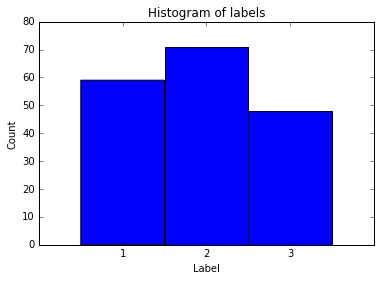

In [156]:
plt.figure()
hist = plt.hist(data[:,0], bins=np.arange(.5,4.5,1.))
plt.xlim(0,4)
plt.xticks([1,2,3])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title("Histogram of labels")

### Now do the same for every feature
Introducing subplots

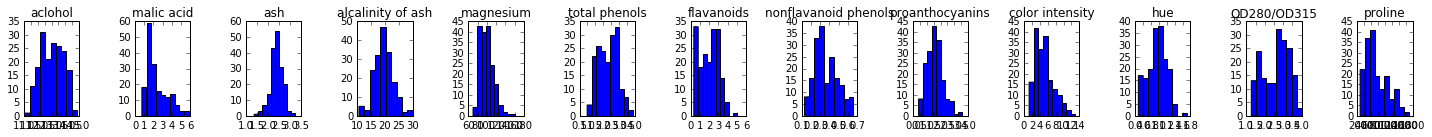

In [157]:
fig = plt.figure(figsize=(20,2))
for i in range(1,data.shape[1]):
    fig.add_subplot(1,data.shape[1]-1,i)
    plt.hist(data[:,i])
    plt.title(attribs[i])
    
plt.tight_layout()

### Correlation matrix
Introducing plots of data-slices with defined markers and colors

How are the features distributed for each label?

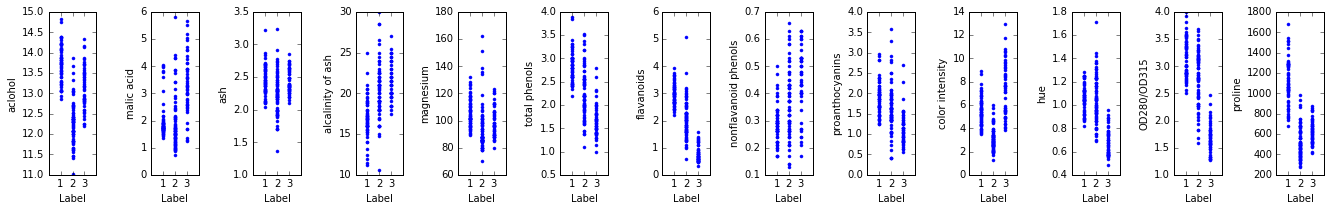

In [158]:
fig = plt.figure(figsize=(20,3))
for i in range(1,data.shape[1]):
    fig.add_subplot(1, data.shape[1], i)
    plt.plot(data[:,0], data[:,i], 'b.')
    plt.xlabel('Label')
    plt.ylabel(attribs[i])
    plt.xticks([1,2,3])
    plt.xlim([0,4])
    
plt.tight_layout()

# Sklearn

Powerful toolbox for Data Analysis/Mining and Machine Learning

Unified interfaces for all kinds of classifiers (fit, predict),

convenience functions for validation

<img src="sklearn.png" style="width:45%;float:left;padding-top:50px;"/>
<img src="sklearn_map.png" style="width:45%;float:left;"/>
<br style="clear:both;"/>



## Example for next exercise: Compute a logistic regression classifier

Achieved an accuracy score of:  0.97191011236


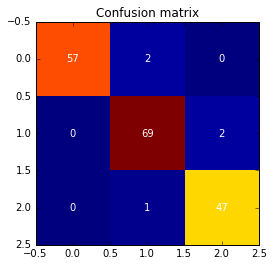

In [159]:
X = data[:,1:]
Y = data[:,0]
logreg = linear_model.LogisticRegression()
logreg.fit(X,Y)
Y_pred = logreg.predict(X)

fig = plt.figure()
plt.imshow(confusion_matrix(Y,Y_pred), interpolation='nearest')
textcolor = 'white'
for x in range(np.unique(Y).shape[0]):
    for y in range(np.unique(Y).shape[0]):
        plt.annotate("%d" % cm[x][y], xy=(y, x),  horizontalalignment='center', verticalalignment='center', color=textcolor)
plt.title("Confusion matrix")

print "Achieved an accuracy score of: ", accuracy_score(Y,Y_pred)

## Error: NEVER test on data you used for training!
### Solution: splitting or folding
<img src="cross_validation.jpg">

## Option 1, by hand, simple split:

In [174]:
split = int(len(X)*.7)
X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]
print X_train.shape
print Y_train.shape
print X_test.shape
print Y_test.shape

(124, 13)
(124,)
(54, 13)
(54,)


## Option 2, let sklearn shuffle for you, with randomization

In [173]:
from sklearn import cross_validation
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.3, random_state=0)
print X_train.shape
print Y_train.shape
print X_test.shape
print Y_test.shape

(124, 13)
(124,)
(54, 13)
(54,)


## Option 3, let sklearn shuffle **and** evaluate your classifier

In [162]:
scores = cross_validation.cross_val_score(logreg, X, Y, cv=5)
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.91891892  0.94444444  0.94444444  1.          1.        ]
Accuracy: 0.96 (+/- 0.07)
